**Python Programming for Economics and Finance** Pandas

Thomas J. Sargent & John Stachurski

---

# 14. Pandas

In [1]:
!pip install --upgrade pandas-datareader
!pip install --upgrade yfinance

     |████████████████████████████████| 109 kB 443 kB/s eta 0:00:01


# 14.1. Overview

Pandas is a package of fast, efficient data analysis tools for Python.

Just as NumPy provides the basic array data type plus core array operations, pandas

1. defines fundamental structures for working with data and
2. endows them with methods that facilitate operations such as
* reading in data
* adjusting indices
* working with dates and time series
* sorting, grouping, re-ordering and general data munging 1
* dealing with missing values, etc., etc.

More sophisticated statistical functionality is left to other packages, such as `statsmodels` and `scikit-learn`, which are built on top of pandas.


In [4]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10,8] # Set default figure size
import requests

# 14.2 Series 

Two important data types definied by pandas are `Series` and `DataFrame`. `Series` is like a "column" of data, such as a collection of observations on a single variable. 

A `DataFrame` is an object for storing related columns of data. 

In [5]:
s = pd.Series(np.random.randn(4), name='daily returns')
s

0   -0.059451
1    0.802627
2    1.631106
3    0.650846
Name: daily returns, dtype: float64

Here you can imagine the indices `0,1,2,3` as indexing four listed companies, and the values being daily returns on their shares. 

Pandas `Series` are built on top of Numpy arrays and support many similar operations. 

In [6]:
s * 100

0     -5.945103
1     80.262677
2    163.110618
3     65.084561
Name: daily returns, dtype: float64

In [7]:
np.abs(s)

0    0.059451
1    0.802627
2    1.631106
3    0.650846
Name: daily returns, dtype: float64

But `Series` prvide more than Numpy arrays. 
Not only do they have some additional (statistically oriented) methods. 

In [8]:
s.describe()

count    4.000000
mean     0.756282
std      0.693782
min     -0.059451
25%      0.473271
50%      0.726736
75%      1.009747
max      1.631106
Name: daily returns, dtype: float64

But their indices are more flexible 

In [10]:
s.index = ['AMZN', 'AAPL', 'MSFT', 'GOOG']
s

AMZN   -0.059451
AAPL    0.802627
MSFT    1.631106
GOOG    0.650846
Name: daily returns, dtype: float64

Viewed in this way, `Series` are like fast, efficient Python dictionaries (with the restriction that the items in the dictionary all habe the same type - in this case, floats.)

In [12]:
s['AMZN']

-0.05945102518418009

In [13]:
s['AMZN'] = 0
s

AMZN    0.000000
AAPL    0.802627
MSFT    1.631106
GOOG    0.650846
Name: daily returns, dtype: float64

In [14]:
'AMZN' in s

True

# 14.3 DataFrames

While a `Series` is a single column of data, a `DataFrame` is several columns, one for each variable.

In essence, a `DataFrame` in pandas is analogous to a (highly optimized) Excel spreadsheet.

Thus, it is a powerful tool for representing and analyzing data that are naturally organized into rows and columns, often with descriptive indexes for individual rows and individual columns.

Let’s look at an example that reads data from the CSV file `pandas/data/test_pwt.csv`, which is taken from the Penn World Tables.

Here’s the content of `test_pwt.csv`

In [15]:
df = pd.read_csv('https://raw.githubusercontent.com/QuantEcon/lecture-python-programming/master/source/_static/lecture_specific/pandas/data/test_pwt.csv')
df

,country,country isocode,year,POP,XRAT,tcgdp,cc,cg
0,Argentina,ARG,2000,37335.653,0.999500,2.950722e+05,75.716805,5.578804
1,Australia,AUS,2000,19053.186,1.724830,5.418047e+05,67.759026,6.720098
2,India,IND,2000,1006300.297,44.941600,1.728144e+06,64.575551,14.072206
3,Israel,ISR,2000,6114.570,4.077330,1.292539e+05,64.436451,10.266688
4,Malawi,MWI,2000,11801.505,59.543808,5.026222e+03,74.707624,11.658954
5,South Africa,ZAF,2000,45064.098,6.939830,2.272424e+05,72.718710,5.726546
6,United States,USA,2000,282171.957,1.000000,9.898700e+06,72.347054,6.032454
7,Uruguay,URY,2000,3219.793,12.099592,2.525596e+04,78.978740,5.108068


In [16]:
type(df)

pandas.core.frame.DataFrame

In [17]:
df[2:5]

,country,country isocode,year,POP,XRAT,tcgdp,cc,cg
2,India,IND,2000,1006300.297,44.941600,1.728144e+06,64.575551,14.072206
3,Israel,ISR,2000,6114.570,4.077330,1.292539e+05,64.436451,10.266688
4,Malawi,MWI,2000,11801.505,59.543808,5.026222e+03,74.707624,11.658954


To select columns, we can pass a `list` containing the names of the desired columns represented as strings. 

In [18]:
df[['country', 'tcgdp']]

,country,tcgdp
0,Argentina,2.950722e+05
1,Australia,5.418047e+05
2,India,1.728144e+06
3,Israel,1.292539e+05
4,Malawi,5.026222e+03
5,South Africa,2.272424e+05
6,United States,9.898700e+06
7,Uruguay,2.525596e+04


To select both rows and columns using integers, the `iloc` attributes should be sued with the format `.iloc[rows, columns]`

In [19]:
df.iloc[2:5, 0:4]

,country,country isocode,year,POP
2,India,IND,2000,1006300.297
3,Israel,ISR,2000,6114.570
4,Malawi,MWI,2000,11801.505


To select rows and columns using a mixture of integers and labels, the `loc` attribute can be used in the similar way. 

In [21]:
df.loc[df.index[2:5], ['country', 'tcgdp']]

,country,tcgdp
2,India,1.728144e+06
3,Israel,1.292539e+05
4,Malawi,5.026222e+03


One way to strip the data frame `df` down to only these variables is to overwrite the dataframe using the selection method described above.

In [23]:
df = df[['country', 'POP', 'tcgdp']]
df

,country,POP,tcgdp
0,Argentina,37335.653,2.950722e+05
1,Australia,19053.186,5.418047e+05
2,India,1006300.297,1.728144e+06
3,Israel,6114.570,1.292539e+05
4,Malawi,11801.505,5.026222e+03
5,South Africa,45064.098,2.272424e+05
6,United States,282171.957,9.898700e+06
7,Uruguay,3219.793,2.525596e+04


Here the index `0, 1, ..., 7` is redundant because we can use the country names as an index. 

To do this, we set the index to be the `country` variable in the dataframe.

In [24]:
df = df.set_index('country')
df

,POP,tcgdp
country,,
Argentina,37335.653,2.950722e+05
Australia,19053.186,5.418047e+05
India,1006300.297,1.728144e+06
Israel,6114.570,1.292539e+05
Malawi,11801.505,5.026222e+03
South Africa,45064.098,2.272424e+05
United States,282171.957,9.898700e+06
Uruguay,3219.793,2.525596e+04


Let's give the columns slightly better names.

In [25]:
df.columns = 'population', 'total GDP'
df

,population,total GDP
country,,
Argentina,37335.653,2.950722e+05
Australia,19053.186,5.418047e+05
India,1006300.297,1.728144e+06
Israel,6114.570,1.292539e+05
Malawi,11801.505,5.026222e+03
South Africa,45064.098,2.272424e+05
United States,282171.957,9.898700e+06
Uruguay,3219.793,2.525596e+04


In [26]:
df['population'] = df['population'] * 1e3
df

,population,total GDP
country,,
Argentina,3.733565e+07,2.950722e+05
Australia,1.905319e+07,5.418047e+05
India,1.006300e+09,1.728144e+06
Israel,6.114570e+06,1.292539e+05
Malawi,1.180150e+07,5.026222e+03
South Africa,4.506410e+07,2.272424e+05
United States,2.821720e+08,9.898700e+06
Uruguay,3.219793e+06,2.525596e+04


Adding a column showing real GDP per capita, multiplying by 1,000,000,as we go because total GDP is in millions. 

In [29]:
df['GDP percap'] = df['total GDP'] *1e6 / df['population']
df

,population,total GDP,real GDP,GDP percap
country,,,,
Argentina,3.733565e+07,2.950722e+05,7903.229085,7903.229085
Australia,1.905319e+07,5.418047e+05,28436.433261,28436.433261
India,1.006300e+09,1.728144e+06,1717.324719,1717.324719
Israel,6.114570e+06,1.292539e+05,21138.672749,21138.672749
Malawi,1.180150e+07,5.026222e+03,425.896679,425.896679
South Africa,4.506410e+07,2.272424e+05,5042.647686,5042.647686
United States,2.821720e+08,9.898700e+06,35080.381854,35080.381854
Uruguay,3.219793e+06,2.525596e+04,7843.970620,7843.970620


One of the nice things about pandas `DataFrame` and `Series` objects is that they have methods for plotting and visualization that work through Matplotlib.

Generate a bar plot of GDP per capital

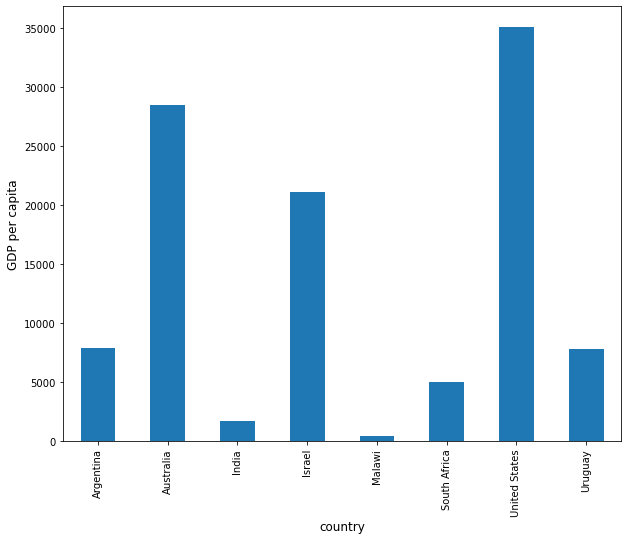

In [31]:
ax = df['GDP percap'].plot(kind = 'bar')
ax.set_xlabel('country', fontsize=12)
ax.set_ylabel('GDP per capita', fontsize=12)
plt.show()

At the moment the data frame is ordered alphabetically on the countries—let’s change it to GDP per capita

In [32]:
df = df.sort_values(by='GDP percap', ascending = False)
df

,population,total GDP,real GDP,GDP percap
country,,,,
United States,2.821720e+08,9.898700e+06,35080.381854,35080.381854
Australia,1.905319e+07,5.418047e+05,28436.433261,28436.433261
Israel,6.114570e+06,1.292539e+05,21138.672749,21138.672749
Argentina,3.733565e+07,2.950722e+05,7903.229085,7903.229085
Uruguay,3.219793e+06,2.525596e+04,7843.970620,7843.970620
South Africa,4.506410e+07,2.272424e+05,5042.647686,5042.647686
India,1.006300e+09,1.728144e+06,1717.324719,1717.324719
Malawi,1.180150e+07,5.026222e+03,425.896679,425.896679


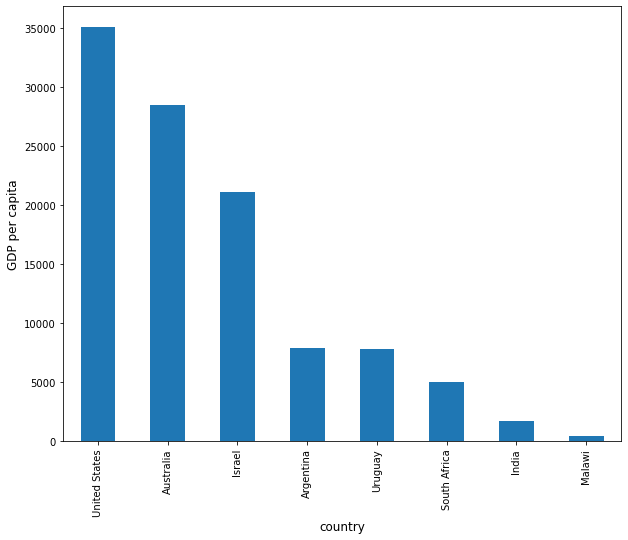

In [34]:
ax = df['GDP percap'].plot(kind='bar')
ax.set_xlabel('country', fontsize = 12)
ax.set_ylabel('GDP per capita', fontsize = 12)
plt.show()

# 14.4 On-Line Data Sources 

Python makes it straightforward to query online databases programmatically.

An important database for economists is `FRED` — a vast collection of time series data maintained by the St. Louis Fed.

For example, suppose that we are interested in the `unemployment rate`.

Via FRED, the entire series for the US civilian unemployment rate can be downloaded directly by entering this URL into your browser (note that this requires an internet connection)

http://research.stlouisfed.org/fred2/series/UNRATE/downloaddata/UNRATE.scv

(Equivalently, click here: https://research.stlouisfed.org/fred2/series/UNRATE/downloaddata/UNRATE.csv)

This request returns a `CSV file`, which will be handled by your default application for this class of files.

Alternatively, we can access the CSV file from within a Python program.

This can be done with a variety of methods.

We start with a relatively low-level method and then return to pandas.

## Accessing Data with requests

One option is to use `requests`, a standard Python library for requesting data over the Internet.

To begin, try the following code on your computer.


In [36]:
r = requests.get('http://research.stlouisfed.org/fred2/series/UNRATE/downloaddata/UNRATE.csv')

If there’s no error message, then the call has succeeded.

If you do get an error, then there are two likely causes

You are not connected to the Internet — hopefully, this isn’t the case.
Your machine is accessing the Internet through a proxy server, and Python isn’t aware of this.
In the second case, you can either

switch to another machine
solve your proxy problem by reading the documentation
Assuming that all is working, you can now proceed to use the source object returned by the call requests.get('http://research.stlouisfed.org/fred2/series/UNRATE/downloaddata/UNRATE.csv')

In [37]:
url= 'http://research.stlouisfed.org/fred2/series/UNRATE/downloaddata/UNRATE.csv'
source = requests.get(url).content.decode().split('\n')
source[0]

'DATE,VALUE\r'

In [39]:
source[1]

'1948-01-01,3.4\r'

We could now write some additional code to parse this text and store it as an array.

But this is unnecessary — pandas’ `read_csv` function can handle the task for us.

We use` parse_dates=True` so that pandas recognizes our dates column, allowing for simple date filtering.

In [40]:
data = pd.read_csv(url, index_col=0, parse_dates= True)

In [43]:
data
type(data)

pandas.core.frame.DataFrame

The data has been read into a pandas DataFrame called data that we can now manipulate in the usual way.


In [45]:
data.head() # A useful method to get a quick look at a data frame

,VALUE
DATE,
1948-01-01,3.4
1948-02-01,3.8
1948-03-01,4.0
1948-04-01,3.9
1948-05-01,3.5


In [47]:
pd.set_option('display.precision', 1)
data.describe()

,VALUE
count,894.0
mean,5.7
std,1.7
min,2.5
25%,4.5
50%,5.5
75%,6.8
max,14.7


We can also plot the unemployment rate from 2006 to 2012 as follows.

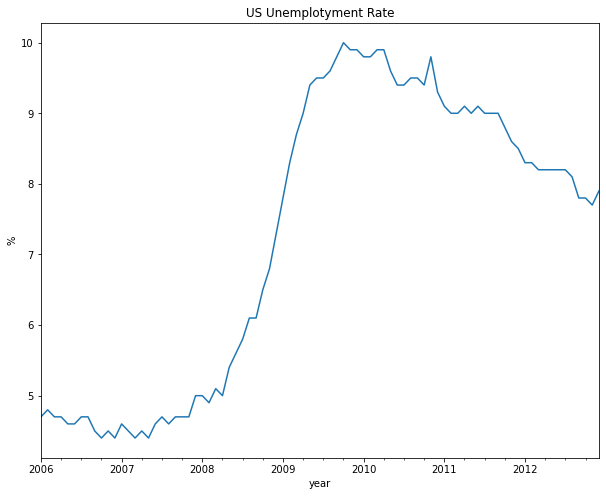

In [49]:
ax = data['2006':'2012'].plot(title='US Unemplotyment Rate', legend=False)
ax.set_xlabel('year')
ax.set_ylabel('%')
plt.show()

Note that pandas offers many other file type alternatives.

Pandas has a wide variety of top-level methods that we can use to read, excel, json, parquet or plug straight into a database server.

## Using pandas_datareader and yfinance to Assess Data

The maker of pandas has also authored a library called pandas_datareader that gives programmatic access to many data sources straight from the Jupyter notebook.

While some sources require an access key, many of the most important (e.g., `FRED, OECD, EUROSTAT and the World Bank`) are free to use.

We will also use `yfinance` to fetch data from `Yahoo finance` in the exercises.

For now let’s work through one example of downloading and plotting data — this time from the `World Bank`.

ps: There are also other `python libraries` available for working with world bank data such as `wbgapi`.

The World Bank `collects and organizes data` on a huge range of indicators.

For example, here’s some data on government debt as a ratio to GDP.

The next code example fetches the data for you and plots time series for the US and Australia

In [50]:
from pandas_datareader import wb # world bank 

govt_debt = wb.download(
    indicator = 'GC.DOD.TOTL.GD.ZS', 
    country=['US', 'AU'],
    start = 2005, 
    end = 2016,
).stack().unstack(0)

govt_debt

,country,Australia,United States
year,,,
2005,GC.DOD.TOTL.GD.ZS,2.2e-02,56.5
2006,GC.DOD.TOTL.GD.ZS,2.2e-02,55.5
2007,GC.DOD.TOTL.GD.ZS,2.0e-02,55.7
2008,GC.DOD.TOTL.GD.ZS,1.8e-02,63.8
2009,GC.DOD.TOTL.GD.ZS,2.4e-02,76.0
2010,GC.DOD.TOTL.GD.ZS,2.9e-02,85.1
2011,GC.DOD.TOTL.GD.ZS,3.1e-02,89.7
2012,GC.DOD.TOTL.GD.ZS,4.0e-02,93.8
2013,GC.DOD.TOTL.GD.ZS,3.8e-02,95.7


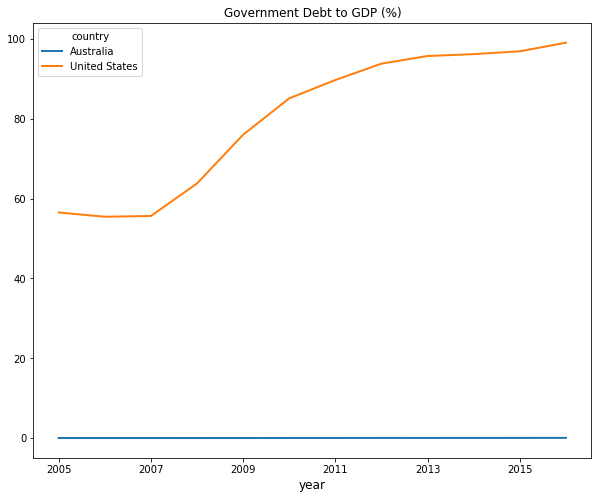

In [52]:
ind = govt_debt.index.droplevel(-1)
govt_debt.index = ind
ax = govt_debt.plot(lw=2)
ax.set_xlabel('year', fontsize = 12)
plt.title('Government Debt to GDP (%)')
plt.show()

# 14.5 Exercises

In [54]:
import datetime as dt
import yfinance as yf

In [55]:
# Exercise 14.1 

ticker_list = {'INTC': 'Intel',
               'MSFT': 'Microsoft',
               'IBM': 'IBM',
               'BHP': 'BHP',
               'TM': 'Toyota',
               'AAPL': 'Apple',
               'AMZN': 'Amazon',
               'BA': 'Boeing',
               'QCOM': 'Qualcomm',
               'KO': 'Coca-Cola',
               'GOOG': 'Google',
               'SNE': 'Sony',
               'PTR': 'PetroChina'}

In [69]:
def read_data(ticker_list, 
             start = dt.datetime(2019,1,2),
             end = dt.datetime(2019,12,31),
             ):
    """
    This function reads in closing price data from Yahoo for each tick in the ticker_list.
    """
    ticker = pd.DataFrame()
    
    for tick in ticker_list:
        stock = yf.Ticker(tick)
        prices = stock.history(start=start, end=end)
        closing_prices = prices["Close"]
        ticker[tick] = closing_prices
    return ticker

ticker = read_data(ticker_list)
ticker


- SNE: No data found, symbol may be delisted


,INTC,MSFT,IBM,BHP,TM,AAPL,AMZN,BA,QCOM,KO,GOOG,SNE,PTR
Date,,,,,,,,,,,,,
2019-01-02,43.0,97.4,92.8,42.1,116.3,38.2,77.0,314.6,52.5,42.0,1045.8,NaN,49.1
2019-01-03,40.7,93.8,91.0,40.8,114.7,34.4,75.0,302.1,50.9,41.8,1016.1,NaN,49.3
2019-01-04,43.1,98.1,94.5,43.3,119.7,35.9,78.8,317.8,51.8,42.6,1070.7,NaN,50.6
2019-01-07,43.3,98.3,95.2,43.6,121.3,35.8,81.5,318.8,51.6,42.0,1068.4,NaN,50.4
2019-01-08,43.6,99.0,96.5,43.4,122.3,36.5,82.8,330.9,51.2,42.5,1076.3,NaN,51.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-23,55.5,153.8,114.4,52.2,142.0,69.8,89.7,335.6,83.9,50.7,1348.8,NaN,41.7
2019-12-24,55.6,153.8,114.0,52.2,141.3,69.8,89.5,331.0,84.2,50.5,1343.6,NaN,41.4
2019-12-26,56.0,155.0,113.9,52.5,141.5,71.2,93.4,328.0,83.8,50.8,1360.4,NaN,41.8


In [73]:
change = ticker.pct_change(periods= len(ticker)-1, axis = 'rows')*100
price_change = change.iloc[-1]
price_change
change

,INTC,MSFT,IBM,BHP,TM,AAPL,AMZN,BA,QCOM,KO,GOOG,SNE,PTR
Date,,,,,,,,,,,,,
2019-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-12-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-12-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Alternatively you can use an inbuilt method `pct_change` and configure it to perform the correct calculation using `periods` argument.

In [74]:
change = ticker.pct_change(periods= 2, axis = 'rows')*100
price_change = change.iloc[-1]
price_change
change

,INTC,MSFT,IBM,BHP,TM,AAPL,AMZN,BA,QCOM,KO,GOOG,SNE,PTR
Date,,,,,,,,,,,,,
2019-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-04,0.3,8.0e-01,1.8,2.8,3.0e+00,-6.1,2.4e+00,1.0,-1.4e+00,1.4,2.4,NaN,3.1e+00
2019-01-07,6.6,4.8e+00,4.6,6.7,5.8e+00,4.0,8.6e+00,5.5,1.3e+00,0.7,5.2,NaN,2.3e+00
2019-01-08,1.1,8.5e-01,2.1,0.2,2.2e+00,1.7,5.2e+00,4.1,-1.1e+00,-0.2,0.5,NaN,1.7e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-23,2.2,1.1e+00,0.7,-0.2,-5.6e-01,1.4,4.0e-02,1.2,-4.5e-02,1.1,-0.5,NaN,1.2e+00
2019-12-24,0.8,-1.9e-02,-0.4,0.2,-4.4e-01,1.7,1.5e-01,1.5,-9.0e-02,-0.5,-0.4,NaN,-4.1e-02
2019-12-26,1.0,8.0e-01,-0.5,0.5,-3.0e-01,2.1,4.2e+00,-2.3,-5.7e-02,0.2,0.9,NaN,2.6e-01


In [75]:
p1 = ticker.iloc[0]
p2 = ticker.iloc[-1]
price_change = (p2 - p1) / p1 *100
price_change

INTC    29.8
MSFT    58.1
IBM     20.8
BHP     24.3
TM      20.9
AAPL    87.4
AMZN    20.0
BA       3.1
QCOM    59.8
KO      21.5
GOOG    27.8
SNE      NaN
PTR    -14.9
dtype: float64

In [80]:
price_change.sort_values(inplace= True)
price_change
price_change = price_change.rename(index= ticker_list)
price_change


PetroChina   -14.9
Boeing         3.1
Amazon        20.0
IBM           20.8
Toyota        20.9
Coca-Cola     21.5
BHP           24.3
Google        27.8
Intel         29.8
Microsoft     58.1
Qualcomm      59.8
Apple         87.4
Sony           NaN
dtype: float64

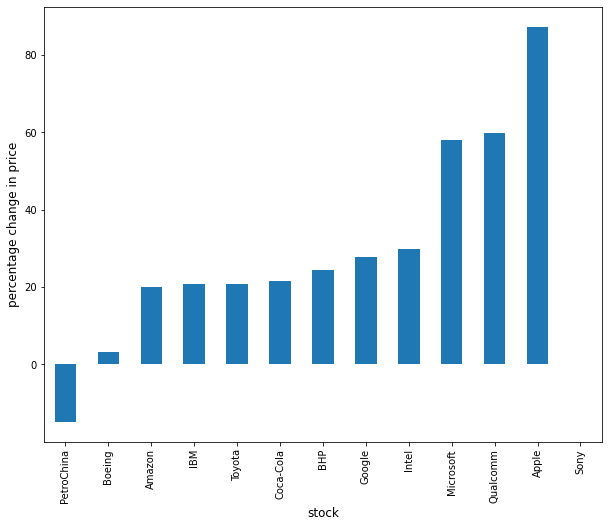

In [84]:
fig, ax = plt.subplots(figsize= (10,8))
ax.set_xlabel('stock' , fontsize = 12)
ax.set_ylabel('percentage change in price', fontsize = 12)
price_change.plot(kind = 'bar', ax=ax)
plt.show()

In [ ]:
# Exercises 14.2


In [85]:
indices_list = {'^GSPC': 'S&P 500',
               '^IXIC': 'NASDAQ',
               '^DJI': 'Dow Jones',
               '^N225': 'Nikkei'}

In [93]:
def get_data(indices_list):
    for index in indices_list:
        data = yf.Ticker(index)
        prices = data.history(start = dt.datetime(1900,1,1), end = dt.datetime(2022,1,1))['Close']
    return prices

get_data(indices_list)

Date
1927-12-30      17.7
1928-01-03      17.8
1928-01-04      17.7
1928-01-05      17.5
1928-01-06      17.7
               ...  
2021-12-27    4791.2
2021-12-28    4786.4
2021-12-29    4793.1
2021-12-30    4778.7
2021-12-31    4766.2
Name: Close, Length: 23614, dtype: float64
Date
1971-02-05      100.0
1971-02-08      100.8
1971-02-09      100.8
1971-02-10      100.7
1971-02-11      101.4
               ...   
2021-12-27    15871.3
2021-12-28    15781.7
2021-12-29    15766.2
2021-12-30    15741.6
2021-12-31    15645.0
Name: Close, Length: 12840, dtype: float64
Date
1992-01-02     3172.4
1992-01-03     3201.5
1992-01-06     3200.1
1992-01-07     3204.8
1992-01-08     3203.9
               ...   
2021-12-27    36302.4
2021-12-28    36398.2
2021-12-29    36488.6
2021-12-30    36398.1
2021-12-31    36338.3
Name: Close, Length: 7558, dtype: float64
Date
1965-01-05     1257.7
1965-01-06     1264.0
1965-01-07     1274.3
1965-01-08     1286.4
1965-01-12     1288.5
               ...   
2021-

True

Query the data using `read_data` by updating the start and end dates accordingly.

In [95]:
indices_data = read_data(
    indices_list,
    start = dt.datetime(1971,1,1), # Common Start Data
    end = dt.datetime(2020,12,31)
)
indices_data

,^GSPC,^IXIC,^DJI,^N225
Date,,,,
1970-12-31,92.2,NaN,NaN,NaN
1971-01-04,91.2,NaN,NaN,NaN
1971-01-05,91.8,NaN,NaN,1989.4
1971-01-06,92.3,NaN,NaN,1981.7
1971-01-07,92.4,NaN,NaN,2001.0
...,...,...,...,...
2020-12-23,3690.0,12771.1,30129.8,26524.8
2020-12-24,3703.1,12804.7,30199.9,26668.3
2020-12-28,3735.4,12899.4,30404.0,26854.0


In [100]:
yearly_returns = pd.DataFrame()

for index, name in indices_list.items(): # return both dictionary name and item
    p1 = indices_data.groupby(indices_data.index.year)[index].first() # Get the first set of returns as a DataFrame
    p2 = indices_data.groupby(indices_data.index.year)[index].last()
    returns = (p1 - p2) / p1
    yearly_returns[name] = returns

yearly_returns

,S&P 500,NASDAQ,Dow Jones,Nikkei
Date,,,,
1970,0.0e+00,NaN,NaN,NaN
1971,-1.2e-01,-1.4e-01,NaN,-3.6e-01
1972,-1.6e-01,-1.8e-01,NaN,-9.2e-01
1973,1.8e-01,3.2e-01,NaN,1.8e-01
1974,3.0e-01,3.5e-01,NaN,9.9e-02
1975,-2.8e-01,-2.8e-01,NaN,-1.7e-01
1976,-1.8e-01,-2.5e-01,NaN,-1.3e-01
1977,1.1e-01,-7.5e-02,NaN,2.7e-02
1978,-2.4e-02,-1.3e-01,NaN,-2.3e-01


Then, to plot the chart. 

<built-in method flatten of numpy.ndarray object at 0x7fe21e4242d0>
0
1
2
3


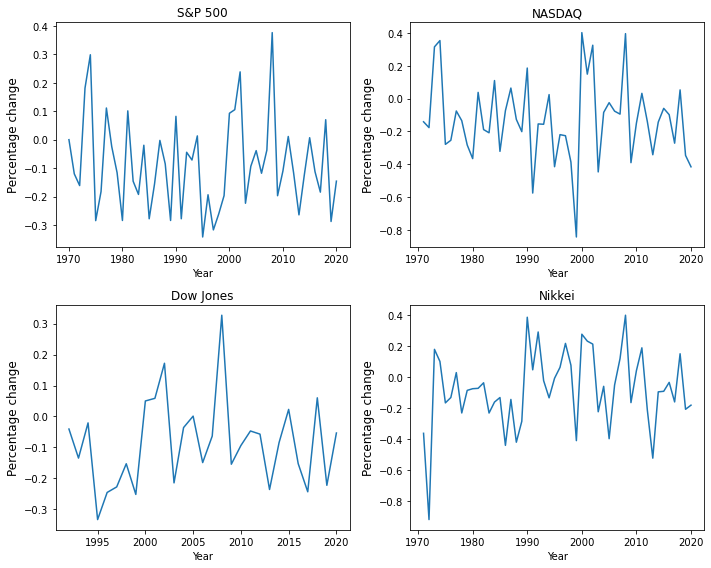

In [104]:
fig , axes = plt.subplots(2,2, figsize=(10,8))
print(axes.flatten)

for iter_, ax in enumerate(axes.flatten()): # Flatten 2D array to 
    print(iter_)
    index_name = yearly_returns.columns[iter_]
    ax.plot(yearly_returns[index_name])
    ax.set_xlabel('Year')
    ax.set_ylabel('Percentage change', fontsize =12)
    ax.set_title(index_name)

plt.tight_layout()